In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels

In [2]:
Price = 'Close'  # 'Close' or 'Adj Close' or 'Open' or 'High' or 'Low'
sector = 'AUTO'

# Task 1:
Download data using yfinance. At present, code is in the form of comments.

In [3]:
# # Define the ticker symbols for Nifty sector-based indices
# nifty_indices = {
#     "NIFTY AUTO": "^CNXAUTO",
#     "NIFTY BANK": "^NSEBANK",
#     "NIFTY FMCG": "^CNXFMCG",
#     "NIFTY IT": "^CNXIT",
#     "NIFTY MEDIA": "^CNXMEDIA",
#     "NIFTY METAL": "^CNXMETAL",
#     "NIFTY PHARMA": "^CNXPHARMA",
#     "NIFTY REALTY": "^CNXREALTY",
#     "NIFTY ENERGY": "^CNXENERGY",
#     "NIFTY INFRA": "^CNXINFRA"
# }

# # Define the period for the historical data
# end_date = datetime.today().strftime('%Y-%m-%d')
# start_date = (datetime.today() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# # Create a dictionary to store the dataframes
# dataframes = {}

# for index_name, ticker in nifty_indices.items():
#     # Download the historical data
#     df = yf.download(ticker, start=start_date, end=end_date)
#     dataframes[index_name] = df
#     # Save each dataframe to a CSV file
#     df.to_csv(f"{index_name.replace(' ', '_')}.csv")
#     print(f"Downloaded data for {index_name} and saved to {index_name.replace(' ', '_')}.csv")

# print("All data has been downloaded and saved.")

Time Series Forcasting:
Univariate time series: only single observations 
Cross-sectional area: Multiple variables taken in one time period
Pattern: 
Trend: Long term relatively smooth pattern that usually persists for more than one year.
Seasonal: A pattern that occurs in regular intervals wherin the frequency of occurence is less than 1 year
Cyclical: 

Models:
AutoRegressive(AR) model: Only depends on past values
    y(t) = f(y(t-1), y(t-2), ...)
Moving Average Model (MA): Output depends only on random error terms
    y(t) = f(E(t-1), E(t-2), ...)
    MA()
AutoRegressive Moving Average Model (ARMA): Mix of MA and AR models
    y(t) = b0 + b1.y(t-1) + b2.y(t-2) + b3*y(t-3)... + p0 + p1.E(t-1) + p2.E(t-2) + p3.E(t-3)...

Stationarity: If marginal distribution of y at time t p(y(t)) is same as at any other point in time.
    p(Y_t) = p(Y_{t+k}) for all t, k => mean, variance of Y is time independent.

Covariance stationarity: Here average, and variance are constant. Covariance between different pairs of Y_{t}'s are dependent on log(difference of subscript)
A non-stationarity series (orginal) --differntiating d times --> stationary series, here say the orginal series to be integrated of order d      (I(d))
So a stationary series is I(0)

In [4]:
SECTOR = {
    "AUTO": "NIFTY_AUTO",
    "BANK": "NIFTY_BANK",
    "FMCG": "NIFTY_FMCG",
    "IT": "NIFTY_IT",
    "MEDIA": "NIFTY_MEDIA",
    "METAL": "NIFTY_METAL",
    "PHARMA": "NIFTY_PHARMA",
    "REALTY": "NIFTY_REALTY",
    "ENERGY": "NIFTY_ENERGY",
    "INFRA": "NIFTY_INFRA"
}

In [5]:
# import argparse

# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()

# # Add the arguments to the parser

# # Sector name to analyze
# ap.add_argument("-s", "--sector", type=str, default= "BANK", required=True, choices=SECTOR.keys(),
# 	help="sector name to analyze (upper case)")

# # Parse the arguments
# args = vars(ap.parse_args())

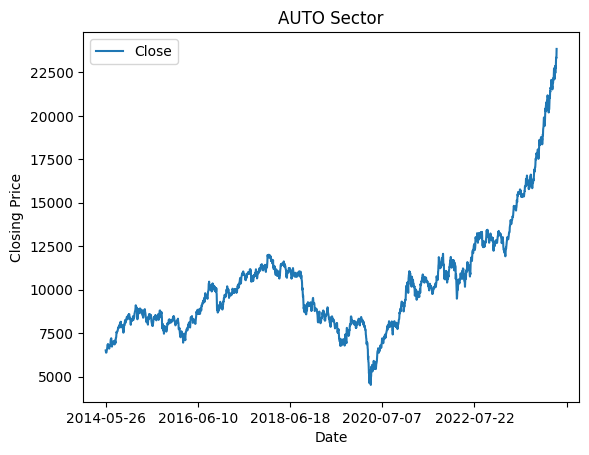

In [7]:
def parser(x):
    return datetime.strptime(x, format='%Y-%m-%d')



# # Get the sector name
# # sector = args["sector"]

# Read the downloaded csv file for the sector
df = pd.read_csv(f"{SECTOR[sector]}.csv", date_format=parser)
df.plot(y=Price, x='Date', title=f"{sector} Sector", ylabel="Closing Price", xlabel="Date")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

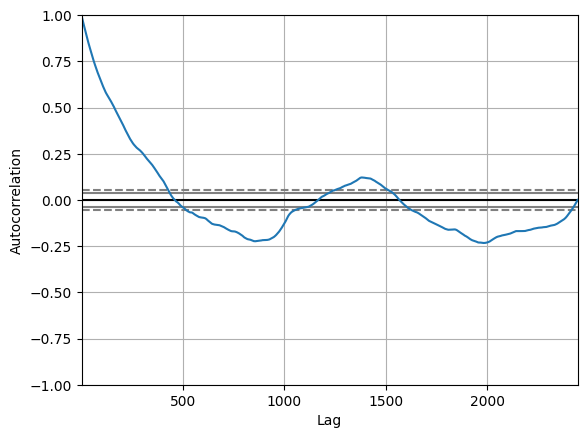

In [8]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df[Price])

In [9]:
df = pd.read_csv(f"{SECTOR[sector]}.csv")       # Load the data from the CSV file
df['Date'] = pd.to_datetime(df['Date'])         # Convert the Date column to datetime
df.set_index('Date', inplace=True)              # Set the Date column as the index
df.sort_index(inplace=True)                     # Sort the data based on the index

<Axes: xlabel='Date'>

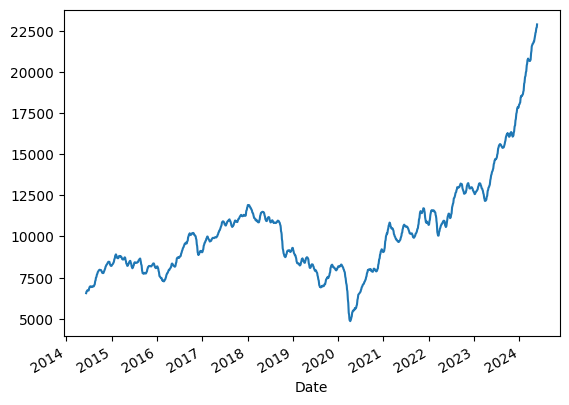

In [10]:
# Rolling mean and standard deviation
df[Price].rolling(window=12).mean().plot()

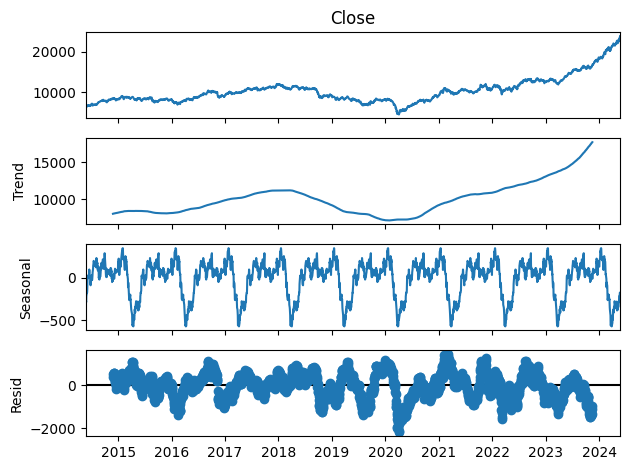

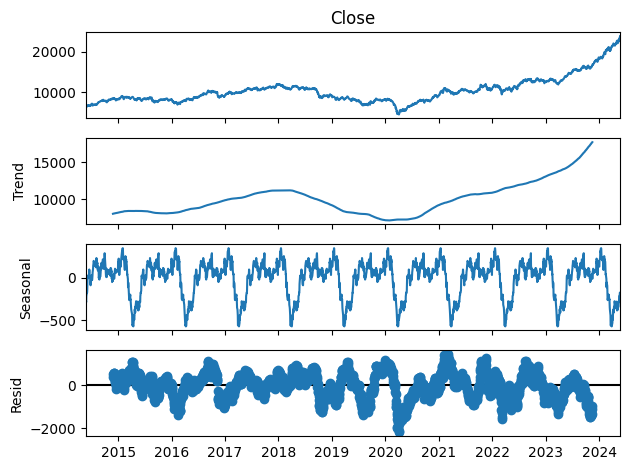

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df[Price], model='additive', period= int(df.shape[0]/10)).plot()


<Axes: xlabel='Date'>

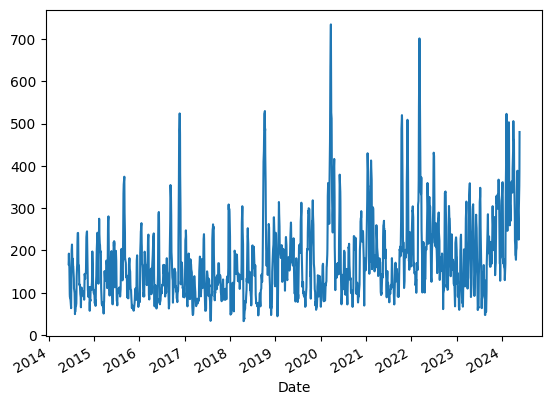

In [12]:
df[Price].rolling(window=12).std().plot()

In [13]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# A function to perform Dickey-Fuller test
def DFT(data_frame):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(data_frame, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# DFT(df[Price])

Since, data appears to be like $x^2$, we will apply square-root on the data.

In [14]:
df_sqrt = np.sqrt(df[Price])
df_diff = df_sqrt.diff().dropna()
DFT(df_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -47.758431
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2445.000000
Critical Value (1%)              -3.433027
Critical Value (5%)              -2.862723
Critical Value (10%)             -2.567400
dtype: float64


Now the data can be considered stationary as the p-value is less than 0.05.

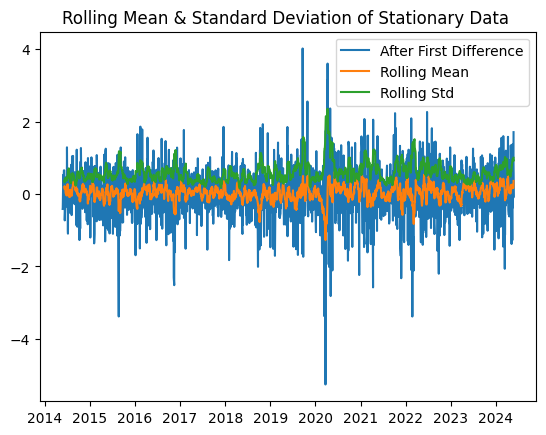

In [15]:
plt.plot(df_diff, label = 'After First Difference')
plt.plot(df_diff.rolling(window=12).mean(), label = 'Rolling Mean')
plt.plot(df_diff.rolling(window=12).std(), label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation of Stationary Data ')
plt.show()

Find p and q using Partial Autocorrelation estimate (PACF) and Autocorrelation estimate (ACF).

In [16]:
from statsmodels.tsa.stattools import acf, pacf

def first_zero_crossing(arr):                       # Function to find the first zero crossing
    for i in range(len(arr)):
        if arr[i] > 0 and arr[i+1] < 0:
            req = i
            break                                   # Break the loop when the first zero crossing is found
    return req



q = first_zero_crossing(acf(df[Price], nlags=500))                   # Autocorrelation
p = first_zero_crossing(pacf(df[Price], nlags=500, method='ols'))    # Partial Autocorrelation

print(f"p = {p}, q = {q}")              

p = 1, q = 459


In [17]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model = ARIMA(df_diff, order=(p, 1, q))                       # d is 1 as we have differenced the data once (df_sqrt ==> df_diff)
ARIMA_model_fit = ARIMA_model.fit()
print(ARIMA_model_fit.summary())

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
pd.DataFrame(ARIMA_model_fit.resid).plot(title='Residuals')
pd.DataFrame(ARIMA_model_fit.resid).plot(kind='kde', title='Residuals Distribution')
pd.DataFrame(ARIMA_model_fit.reside).describe()